<a href="https://colab.research.google.com/github/RakeshSharma21/Sessions_Notebook/blob/main/MLOps_Interview_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLOps Interview Preparation - Hands-On Coding Exercises

**Duration:** 180 minutes  
**Focus:** Advanced ML Algorithms, Time Series, Feature Engineering, and Explainability

---

## Table of Contents
1. [Environment Setup](#setup)
2. [Part II: SVM, Naive Bayes & Feature Engineering](#part2)
3. [Part III: Model Selection & Scikit-learn Pipelines](#part3)
4. [Part IV: Time Series (ARIMA/SARIMA) & Advanced Concepts](#part4)
5. [Part V: Explainability (ELI5, LIME, SHAP, DeepLift)](#part5)

<a id='setup'></a>
## 1. Environment Setup

Install and import all required libraries for the session.

In [1]:
# Install required packages (uncomment if needed)
!pip install scikit-learn pandas numpy matplotlib seaborn statsmodels
!pip install eli5 lime shap deeplift
!pip install mlxtend  # for association rules

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 5.0 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e399aff08e421a249eafb14adcbc2717f5e1cdccdfd869d5955e73d9932af5f3
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
  Created wheel for deeplift: filename=deeplift-0.6.13.0-py3-none-any.whl size=36423 sha256=230e39b98f6fd5c8f5cd943dd347b0219f8831fc0f6710ecf84add1daffba308
  Stored in directory: /root/.cache/pip/wheels/8e/33/34/6679483a8700896a43d5a9cdf73da65288997fe644eabadf36
Successfully built lime deeplift


In [2]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Time Series
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Explainability
import eli5
from eli5.sklearn import PermutationImportance
import lime
from lime import lime_tabular
import shap

# Association Rules
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [6]:
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

---
<a id='part2'></a>
## Part II: SVM, Naive Bayes & Feature Engineering

### Interview Question 1: When to use SVM over Logistic Regression?

**Scenario:** You have a binary classification problem with 1000 samples and 50 features.

In [25]:
# Generate synthetic dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=50, n_informative=30,
                           n_redundant=10, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")

Training samples: 700
Test samples: 300
Number of features: 50


In [26]:
# Compare SVM vs Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import time

# Logistic Regression
start = time.time()
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
lr_time = time.time() - start
lr_score = lr.score(X_test, y_test)

# SVM with Linear Kernel
start = time.time()
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
svm_linear_time = time.time() - start
svm_linear_score = svm_linear.score(X_test, y_test)

# SVM with RBF Kernel
start = time.time()
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
svm_rbf_time = time.time() - start
svm_rbf_score = svm_rbf.score(X_test, y_test)

# Results comparison
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM (Linear)', 'SVM (RBF)'],
    'Accuracy': [lr_score, svm_linear_score, svm_rbf_score],
    'Training Time (s)': [lr_time, svm_linear_time, svm_rbf_time]
})

print("\n📊 Model Comparison:")
print(results.to_string(index=False))

print("\n💡 Interview Answer:")
print("Use SVM when:")
print("  • Clear margin of separation exists")
print("  • High-dimensional space (features > samples)")
print("  • Non-linear decision boundaries (RBF kernel)")
print("  • Outliers present (SVM is more robust)")
print("\nUse Logistic Regression when:")
print("  • Need probabilistic interpretation")
print("  • Fast training required (large datasets)")
print("  • Interpretability is critical")
print("  • Linear separability is sufficient")


📊 Model Comparison:
              Model  Accuracy  Training Time (s)
Logistic Regression  0.833333           0.022902
       SVM (Linear)  0.843333           2.102570
          SVM (RBF)  0.920000           0.022731

💡 Interview Answer:
Use SVM when:
  • Clear margin of separation exists
  • High-dimensional space (features > samples)
  • Non-linear decision boundaries (RBF kernel)
  • Outliers present (SVM is more robust)

Use Logistic Regression when:
  • Need probabilistic interpretation
  • Fast training required (large datasets)
  • Interpretability is critical
  • Linear separability is sufficient


### Interview Question 2: Explain RBF Kernel Intuition

**Concept:** RBF (Radial Basis Function) kernel maps data to infinite-dimensional space.

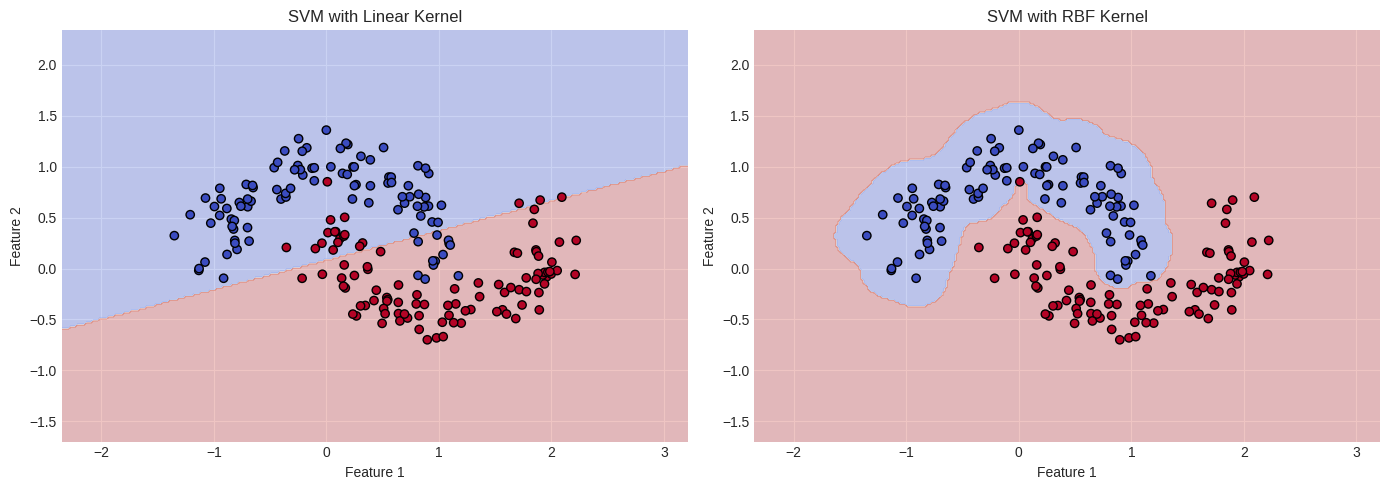


💡 RBF Kernel Intuition:
  • Measures similarity using Gaussian function
  • gamma parameter controls influence radius
  • High gamma → tight fit (overfitting risk)
  • Low gamma → smooth boundary (underfitting risk)
  • Transforms non-linear problems to linear in higher dimension


In [30]:
# Visualize RBF kernel effect on non-linear data
from sklearn.datasets import make_moons

# Create non-linearly separable data
X_moons, y_moons = make_moons(n_samples=200, noise=0.15, random_state=42)

# Train SVM with different kernels
svm_linear_moons = SVC(kernel='linear').fit(X_moons, y_moons)
svm_rbf_moons = SVC(kernel='rbf', gamma=50).fit(X_moons, y_moons)

# Plotting function
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plt.sca(axes[0])
plot_decision_boundary(svm_linear_moons, X_moons, y_moons, 'SVM with Linear Kernel')

plt.sca(axes[1])
plot_decision_boundary(svm_rbf_moons, X_moons, y_moons, 'SVM with RBF Kernel')

plt.tight_layout()
plt.show()

print("\n💡 RBF Kernel Intuition:")
print("  • Measures similarity using Gaussian function")
print("  • gamma parameter controls influence radius")
print("  • High gamma → tight fit (overfitting risk)")
print("  • Low gamma → smooth boundary (underfitting risk)")
print("  • Transforms non-linear problems to linear in higher dimension")

### Interview Question 3: When Does Naive Bayes Fail?

In [40]:
# Create dataset with correlated features
np.random.seed(42)
n_samples = 1000

# Feature 1: Random normal
feature1 = np.random.randn(n_samples)

# Feature 2: Highly correlated with feature1 (violates independence)
feature2 = feature1 * 0.9 + np.random.randn(n_samples) * 0.1

# Feature 3: Independent
feature3 = np.random.randn(n_samples)

# Target: depends on interaction between feature1 and feature2
y_corr = ((feature1 + feature2) > 0).astype(int)
# create two random classes of 1 and 0 for n_samples
y_corr = [np.random.randint(0, 2) for _ in range(n_samples)]

print(y_corr)
X_corr = np.column_stack([feature1, feature2, feature3])


# Check correlation
print("Feature Correlation Matrix:")
print(pd.DataFrame(X_corr, columns=['F1', 'F2', 'F3']).corr())

# Split data
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(
    X_corr, y_corr, test_size=0.3, random_state=42
)

# Train Naive Bayes and Logistic Regression
nb = GaussianNB()
nb.fit(X_train_corr, y_train_corr)
nb_score = nb.score(X_test_corr, y_test_corr)

lr_corr = LogisticRegression()
lr_corr.fit(X_train_corr, y_train_corr)
lr_corr_score = lr_corr.score(X_test_corr, y_test_corr)

print(f"\n📊 Performance on Correlated Features:")
print(f"Naive Bayes Accuracy: {nb_score:.4f}")
print(f"Logistic Regression Accuracy: {lr_corr_score:.4f}")

print("\n💡 When Naive Bayes Fails:")
print("  1. Strong feature correlations (violates independence assumption)")
print("  2. Zero-frequency problem (unseen categories in test data)")
print("  3. Complex feature interactions")
print("  4. Poor probability calibration")
print("\n✅ Mitigation Strategies:")
print("  • Use Laplace/Additive smoothing for zero-frequency")
print("  • Feature selection to reduce correlation")
print("  • Consider more sophisticated models for complex interactions")

[1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 

### Interview Question 4: Feature Engineering for Transactional Data

In [41]:
# Create sample transaction data
np.random.seed(42)
n_transactions = 1000

transaction_data = pd.DataFrame({
    'transaction_id': range(n_transactions),
    'customer_id': np.random.randint(1, 201, n_transactions),
    'transaction_date': pd.date_range('2025-01-01', periods=n_transactions, freq='H'),
    'amount': np.random.exponential(50, n_transactions) + 10,
    'category': np.random.choice(['Electronics', 'Clothing', 'Food', 'Books'], n_transactions),
    'is_fraud': np.random.choice([0, 1], n_transactions, p=[0.95, 0.05])
})

print("Original Transaction Data:")
print(transaction_data.head())

# Feature Engineering
def engineer_transaction_features(df):
    """
    Engineer features from transactional data.
    """
    df = df.copy()

    # Temporal features
    df['hour'] = df['transaction_date'].dt.hour
    df['day_of_week'] = df['transaction_date'].dt.dayofweek
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    df['is_night'] = ((df['hour'] >= 22) | (df['hour'] <= 6)).astype(int)

    # Customer aggregations (grouped features)
    customer_stats = df.groupby('customer_id').agg({
        'amount': ['mean', 'std', 'count', 'max'],
        'transaction_id': 'count'
    })
    customer_stats.columns = ['_'.join(col).strip() for col in customer_stats.columns.values]
    customer_stats.columns = ['customer_avg_amount', 'customer_std_amount',
                               'customer_count_amount', 'customer_max_amount',
                               'customer_transaction_count']

    df = df.merge(customer_stats, on='customer_id', how='left')

    # Deviation from customer average
    df['amount_deviation'] = df['amount'] - df['customer_avg_amount']
    df['amount_zscore'] = df['amount_deviation'] / (df['customer_std_amount'] + 1e-5)

    # Category encoding (frequency encoding)
    category_freq = df['category'].value_counts(normalize=True)
    df['category_frequency'] = df['category'].map(category_freq)

    # Recency feature (time since last transaction per customer)
    df = df.sort_values(['customer_id', 'transaction_date'])
    df['time_since_last'] = df.groupby('customer_id')['transaction_date'].diff().dt.total_seconds() / 3600
    df['time_since_last'] = df['time_since_last'].fillna(0)

    return df

# Apply feature engineering
transaction_features = engineer_transaction_features(transaction_data)

print("\n✨ Engineered Features:")
print(transaction_features[[
    'amount', 'hour', 'is_weekend', 'is_night',
    'customer_avg_amount', 'amount_zscore',
    'category_frequency', 'time_since_last'
]].head())

print("\n💡 Feature Engineering Strategies for Transactions:")
print("  1. Temporal: hour, day_of_week, is_weekend, is_night")
print("  2. Aggregations: customer average, std, count, max")
print("  3. Deviation: amount_deviation, z-score from customer norm")
print("  4. Encoding: frequency encoding for categories")
print("  5. Recency: time since last transaction")
print("  6. Interaction: combinations of temporal + amount features")

Original Transaction Data:
   transaction_id  customer_id    transaction_date      amount     category  \
0               0          103 2025-01-01 00:00:00   54.159173  Electronics   
1               1          180 2025-01-01 01:00:00   51.558265  Electronics   
2               2           93 2025-01-01 02:00:00   33.802906     Clothing   
3               3           15 2025-01-01 03:00:00   30.582724         Food   
4               4          107 2025-01-01 04:00:00  124.953263  Electronics   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

✨ Engineered Features:
         amount  hour  is_weekend  is_night  customer_avg_amount  \
137  131.437135    17           0         0             67.96151   
490  109.936555    10           0         0             67.96151   
536   83.698234     8           0         0             67.96151   
709   41.350448    13           0         0             67.96151   
741   65.340853    21           0         0       

### Interview Question 5: Spotting Feature Leakage

In [42]:
# Example with feature leakage
from sklearn.datasets import make_classification

# Generate base features
X_base, y_leak = make_classification(n_samples=1000, n_features=10,
                                      n_informative=5, random_state=42)

# Create a LEAKED feature that's directly derived from target
# This simulates a common mistake: including post-event information
leaked_feature = y_leak + np.random.randn(1000) * 0.1  # Almost perfect correlation

# Legitimate feature
X_with_leak = np.column_stack([X_base, leaked_feature])
X_no_leak = X_base.copy()

# Split data
X_train_leak, X_test_leak, y_train_leak, y_test_leak = train_test_split(
    X_with_leak, y_leak, test_size=0.3, random_state=42
)

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_no_leak, y_leak, test_size=0.3, random_state=42
)

# Train models
rf_leak = RandomForestClassifier(random_state=42)
rf_leak.fit(X_train_leak, y_train_leak)
score_leak = rf_leak.score(X_test_leak, y_test_leak)

rf_clean = RandomForestClassifier(random_state=42)
rf_clean.fit(X_train_clean, y_train_clean)
score_clean = rf_clean.score(X_test_clean, y_test_clean)

print("🚨 Feature Leakage Detection:")
print(f"Model with leaked feature: {score_leak:.4f}")
print(f"Model without leaked feature: {score_clean:.4f}")

# Feature importance analysis
importances_leak = rf_leak.feature_importances_
print(f"\nLeaked feature importance: {importances_leak[-1]:.4f}")
print(f"Next highest importance: {np.sort(importances_leak)[-2]:.4f}")

print("\n💡 How to Spot Feature Leakage:")
print("  ⚠️  Test accuracy too good to be true (>95% on complex problems)")
print("  ⚠️  One feature has disproportionately high importance")
print("  ⚠️  Feature not available at prediction time")
print("  ⚠️  Feature calculated using future information")
print("  ⚠️  Target encoding without proper cross-validation")
print("\n✅ Prevention:")
print("  • Temporal validation for time-series data")
print("  • Understand data generation process")
print("  • Check feature-target correlation")
print("  • Use pipelines to prevent information flow")

🚨 Feature Leakage Detection:
Model with leaked feature: 1.0000
Model without leaked feature: 0.9400

Leaked feature importance: 0.6715
Next highest importance: 0.0898

💡 How to Spot Feature Leakage:
  ⚠️  Test accuracy too good to be true (>95% on complex problems)
  ⚠️  One feature has disproportionately high importance
  ⚠️  Feature not available at prediction time
  ⚠️  Feature calculated using future information
  ⚠️  Target encoding without proper cross-validation

✅ Prevention:
  • Temporal validation for time-series data
  • Understand data generation process
  • Check feature-target correlation
  • Use pipelines to prevent information flow


---
<a id='part3'></a>
## Part III: Model Selection & Scikit-learn Pipelines

### Interview Question 6: When Does Stratified CV Matter?

In [43]:
# Create imbalanced dataset
X_imb, y_imb = make_classification(n_samples=1000, n_features=20,
                                    n_classes=2, weights=[0.9, 0.1],
                                    random_state=42)

print(f"Class distribution: {np.bincount(y_imb)}")
print(f"Imbalance ratio: {np.bincount(y_imb)[0] / np.bincount(y_imb)[1]:.2f}:1")

# Regular K-Fold
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Stratified K-Fold
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compare class distributions in folds
print("\n📊 Class Distribution in Folds:")
print("\nRegular K-Fold:")
for fold, (train_idx, val_idx) in enumerate(kfold.split(X_imb, y_imb)):
    val_dist = np.bincount(y_imb[val_idx])
    print(f"  Fold {fold+1}: {val_dist} (ratio: {val_dist[0]/val_dist[1]:.2f}:1)")

print("\nStratified K-Fold:")
for fold, (train_idx, val_idx) in enumerate(skfold.split(X_imb, y_imb)):
    val_dist = np.bincount(y_imb[val_idx])
    print(f"  Fold {fold+1}: {val_dist} (ratio: {val_dist[0]/val_dist[1]:.2f}:1)")

# Cross-validation scores
rf = RandomForestClassifier(random_state=42)

cv_scores_regular = cross_val_score(rf, X_imb, y_imb, cv=kfold, scoring='f1')
cv_scores_stratified = cross_val_score(rf, X_imb, y_imb, cv=skfold, scoring='f1')

print(f"\n📈 F1 Score Comparison:")
print(f"Regular K-Fold: {cv_scores_regular.mean():.4f} (±{cv_scores_regular.std():.4f})")
print(f"Stratified K-Fold: {cv_scores_stratified.mean():.4f} (±{cv_scores_stratified.std():.4f})")

print("\n💡 When Stratified CV Matters:")
print("  ✅ Imbalanced datasets (preserves class distribution)")
print("  ✅ Small datasets (ensures minority class in each fold)")
print("  ✅ Multi-class problems with varying class sizes")
print("  ✅ When consistent evaluation is critical")
print("\n❌ Not needed for:")
print("  • Balanced datasets")
print("  • Regression problems (use regular K-Fold)")
print("  • Time-series (use TimeSeriesSplit instead)")

Class distribution: [897 103]
Imbalance ratio: 8.71:1

📊 Class Distribution in Folds:

Regular K-Fold:
  Fold 1: [180  20] (ratio: 9.00:1)
  Fold 2: [181  19] (ratio: 9.53:1)
  Fold 3: [182  18] (ratio: 10.11:1)
  Fold 4: [176  24] (ratio: 7.33:1)
  Fold 5: [178  22] (ratio: 8.09:1)

Stratified K-Fold:
  Fold 1: [180  20] (ratio: 9.00:1)
  Fold 2: [180  20] (ratio: 9.00:1)
  Fold 3: [179  21] (ratio: 8.52:1)
  Fold 4: [179  21] (ratio: 8.52:1)
  Fold 5: [179  21] (ratio: 8.52:1)

📈 F1 Score Comparison:
Regular K-Fold: 0.7264 (±0.0825)
Stratified K-Fold: 0.7376 (±0.0631)

💡 When Stratified CV Matters:
  ✅ Imbalanced datasets (preserves class distribution)
  ✅ Small datasets (ensures minority class in each fold)
  ✅ Multi-class problems with varying class sizes
  ✅ When consistent evaluation is critical

❌ Not needed for:
  • Balanced datasets
  • Regression problems (use regular K-Fold)
  • Time-series (use TimeSeriesSplit instead)


### Interview Question 7: Choosing Metric for Imbalanced Data

In [44]:
# Train a model on imbalanced data
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imb, y_imb, test_size=0.3, random_state=42
)

# Naive classifier (always predicts majority class)
y_pred_naive = np.zeros_like(y_test_imb)

# Smart classifier
rf_imb = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_imb.fit(X_train_imb, y_train_imb)
y_pred_smart = rf_imb.predict(X_test_imb)
y_pred_proba = rf_imb.predict_proba(X_test_imb)[:, 1]

# Calculate metrics
metrics_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'Naive (Always 0)': [
        accuracy_score(y_test_imb, y_pred_naive),
        0.0,  # Precision undefined
        0.0,
        0.0,
        0.5   # Random performance
    ],
    'Smart Classifier': [
        accuracy_score(y_test_imb, y_pred_smart),
        precision_score(y_test_imb, y_pred_smart),
        recall_score(y_test_imb, y_pred_smart),
        f1_score(y_test_imb, y_pred_smart),
        roc_auc_score(y_test_imb, y_pred_proba)
    ]
})

print("📊 Metric Comparison on Imbalanced Data:")
print(metrics_comparison.to_string(index=False))

# Confusion matrices
print("\n🔍 Confusion Matrix - Naive Classifier:")
print(confusion_matrix(y_test_imb, y_pred_naive))

print("\n🔍 Confusion Matrix - Smart Classifier:")
print(confusion_matrix(y_test_imb, y_pred_smart))

print("\n💡 Choosing Metrics for Imbalanced Data:")
print("\n❌ AVOID Accuracy:")
print("  • Naive classifier achieves ~90% by predicting majority class")
print("  • Doesn't reflect minority class performance")

print("\n✅ PREFER:")
print("  • Precision: When false positives are costly")
print("    (e.g., spam detection - don't mark legitimate emails as spam)")
print("  • Recall: When false negatives are costly")
print("    (e.g., fraud detection - don't miss fraudulent transactions)")
print("  • F1-Score: Balance between precision and recall")
print("  • AUC-ROC: Threshold-independent, overall discriminative ability")
print("  • Precision-Recall AUC: Better for extreme imbalance")

📊 Metric Comparison on Imbalanced Data:
   Metric  Naive (Always 0)  Smart Classifier
 Accuracy               0.9          0.930000
Precision               0.0          0.800000
   Recall               0.0          0.400000
 F1-Score               0.0          0.533333
  AUC-ROC               0.5          0.905185

🔍 Confusion Matrix - Naive Classifier:
[[270   0]
 [ 30   0]]

🔍 Confusion Matrix - Smart Classifier:
[[267   3]
 [ 18  12]]

💡 Choosing Metrics for Imbalanced Data:

❌ AVOID Accuracy:
  • Naive classifier achieves ~90% by predicting majority class
  • Doesn't reflect minority class performance

✅ PREFER:
  • Precision: When false positives are costly
    (e.g., spam detection - don't mark legitimate emails as spam)
  • Recall: When false negatives are costly
    (e.g., fraud detection - don't miss fraudulent transactions)
  • F1-Score: Balance between precision and recall
  • AUC-ROC: Threshold-independent, overall discriminative ability
  • Precision-Recall AUC: Better for

### Interview Question 8: Pipeline Benefits & Avoiding Leakage

In [45]:
# Example: Wrong way (data leakage)
print("❌ WRONG: Scaling before split (DATA LEAKAGE)")

# Generate data
X_pipe, y_pipe = make_classification(n_samples=1000, n_features=20, random_state=42)

# WRONG: Scale entire dataset first
scaler_wrong = StandardScaler()
X_scaled_wrong = scaler_wrong.fit_transform(X_pipe)  # Leakage here!

X_train_wrong, X_test_wrong, y_train_pipe, y_test_pipe = train_test_split(
    X_scaled_wrong, y_pipe, test_size=0.3, random_state=42
)

lr_wrong = LogisticRegression()
lr_wrong.fit(X_train_wrong, y_train_pipe)
score_wrong = lr_wrong.score(X_test_wrong, y_test_pipe)

print(f"Test Score (with leakage): {score_wrong:.4f}")

print("\n" + "="*60)
print("\n✅ CORRECT: Using Pipeline (NO LEAKAGE)")

# Split first
X_train_correct, X_test_correct, y_train_correct, y_test_correct = train_test_split(
    X_pipe, y_pipe, test_size=0.3, random_state=42
)

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Fit pipeline (scaling learned only on training data)
pipeline.fit(X_train_correct, y_train_correct)
score_correct = pipeline.score(X_test_correct, y_test_correct)

print(f"Test Score (without leakage): {score_correct:.4f}")

# Cross-validation with pipeline
cv_scores_pipeline = cross_val_score(pipeline, X_train_correct, y_train_correct,
                                      cv=5, scoring='accuracy')
print(f"\nCV Score: {cv_scores_pipeline.mean():.4f} (±{cv_scores_pipeline.std():.4f})")

print("\n💡 Pipeline Benefits:")
print("  1. Prevents data leakage (scaler fit only on train fold)")
print("  2. Ensures consistency between train/test/production")
print("  3. Simplifies cross-validation workflow")
print("  4. Makes code modular and reproducible")
print("  5. Easy hyperparameter tuning across all steps")
print("  6. Single object for serialization and deployment")

# Advanced: Pipeline with GridSearchCV
print("\n" + "="*60)
print("\n🔧 Pipeline with GridSearchCV:")

pipeline_grid = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', LogisticRegression(max_iter=1000))
])

param_grid = {
    'pca__n_components': [5, 10, 15],
    'classifier__C': [0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(pipeline_grid, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_correct, y_train_correct)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")
print(f"Test score: {grid_search.score(X_test_correct, y_test_correct):.4f}")

❌ WRONG: Scaling before split (DATA LEAKAGE)
Test Score (with leakage): 0.8500


✅ CORRECT: Using Pipeline (NO LEAKAGE)
Test Score (without leakage): 0.8500

CV Score: 0.8686 (±0.0173)

💡 Pipeline Benefits:
  1. Prevents data leakage (scaler fit only on train fold)
  2. Ensures consistency between train/test/production
  3. Simplifies cross-validation workflow
  4. Makes code modular and reproducible
  5. Easy hyperparameter tuning across all steps
  6. Single object for serialization and deployment


🔧 Pipeline with GridSearchCV:
Best parameters: {'classifier__C': 0.1, 'pca__n_components': 15}
Best CV score: 0.8542
Test score: 0.8267


### Interview Question 9: GridSearchCV vs RandomizedSearchCV

In [46]:
# Create larger hyperparameter space
from scipy.stats import randint, uniform
import time

# Prepare data
X_train_hp, X_test_hp, y_train_hp, y_test_hp = train_test_split(
    X_pipe, y_pipe, test_size=0.3, random_state=42
)

# GridSearchCV
param_grid_exhaustive = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

total_combinations = (len(param_grid_exhaustive['n_estimators']) *
                      len(param_grid_exhaustive['max_depth']) *
                      len(param_grid_exhaustive['min_samples_split']) *
                      len(param_grid_exhaustive['min_samples_leaf']))

print(f"Total combinations for GridSearch: {total_combinations}")

start = time.time()
grid_cv = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_exhaustive,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_cv.fit(X_train_hp, y_train_hp)
grid_time = time.time() - start

# RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

n_iter = 20  # Number of random samples
print(f"Random samples for RandomizedSearch: {n_iter}")

start = time.time()
random_cv = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_dist,
    n_iter=n_iter,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
random_cv.fit(X_train_hp, y_train_hp)
random_time = time.time() - start

# Compare results
print("\n📊 Comparison:")
print(f"\nGridSearchCV:")
print(f"  Best Score: {grid_cv.best_score_:.4f}")
print(f"  Best Params: {grid_cv.best_params_}")
print(f"  Time: {grid_time:.2f} seconds")
print(f"  Combinations tested: {total_combinations}")

print(f"\nRandomizedSearchCV:")
print(f"  Best Score: {random_cv.best_score_:.4f}")
print(f"  Best Params: {random_cv.best_params_}")
print(f"  Time: {random_time:.2f} seconds")
print(f"  Combinations tested: {n_iter}")

print(f"\n⚡ Speedup: {grid_time/random_time:.2f}x faster")

print("\n💡 When to Use Each:")
print("\nGridSearchCV:")
print("  ✅ Small hyperparameter space")
print("  ✅ Need exhaustive search guarantee")
print("  ✅ Computational budget allows")
print("  ✅ Critical production model")

print("\nRandomizedSearchCV:")
print("  ✅ Large hyperparameter space")
print("  ✅ Limited computational budget")
print("  ✅ Continuous parameters")
print("  ✅ Quick exploration phase")
print("  ✅ Often finds good solutions faster")

Total combinations for GridSearch: 108
Random samples for RandomizedSearch: 20

📊 Comparison:

GridSearchCV:
  Best Score: 0.8957
  Best Params: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
  Time: 93.51 seconds
  Combinations tested: 108

RandomizedSearchCV:
  Best Score: 0.8943
  Best Params: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 63}
  Time: 17.60 seconds
  Combinations tested: 20

⚡ Speedup: 5.31x faster

💡 When to Use Each:

GridSearchCV:
  ✅ Small hyperparameter space
  ✅ Need exhaustive search guarantee
  ✅ Computational budget allows
  ✅ Critical production model

RandomizedSearchCV:
  ✅ Large hyperparameter space
  ✅ Limited computational budget
  ✅ Continuous parameters
  ✅ Quick exploration phase
  ✅ Often finds good solutions faster


---
<a id='part4'></a>
## Part IV: Time Series (ARIMA/SARIMA) & Advanced Concepts

### Interview Question 10: Time Series Stationarity Testing


📊 ADF Test Results for Original Series:
  ADF Statistic: -0.0006
  p-value: 0.9585
  Critical Values:
    1%: -3.466
    5%: -2.877
    10%: -2.575
  ❌ Fail to reject H0: Series is NON-STATIONARY (p ≥ 0.05)

📊 ADF Test Results for First Difference:
  ADF Statistic: -11.3531
  p-value: 0.0000
  Critical Values:
    1%: -3.466
    5%: -2.877
    10%: -2.575
  ✅ Reject H0: Series is STATIONARY (p < 0.05)


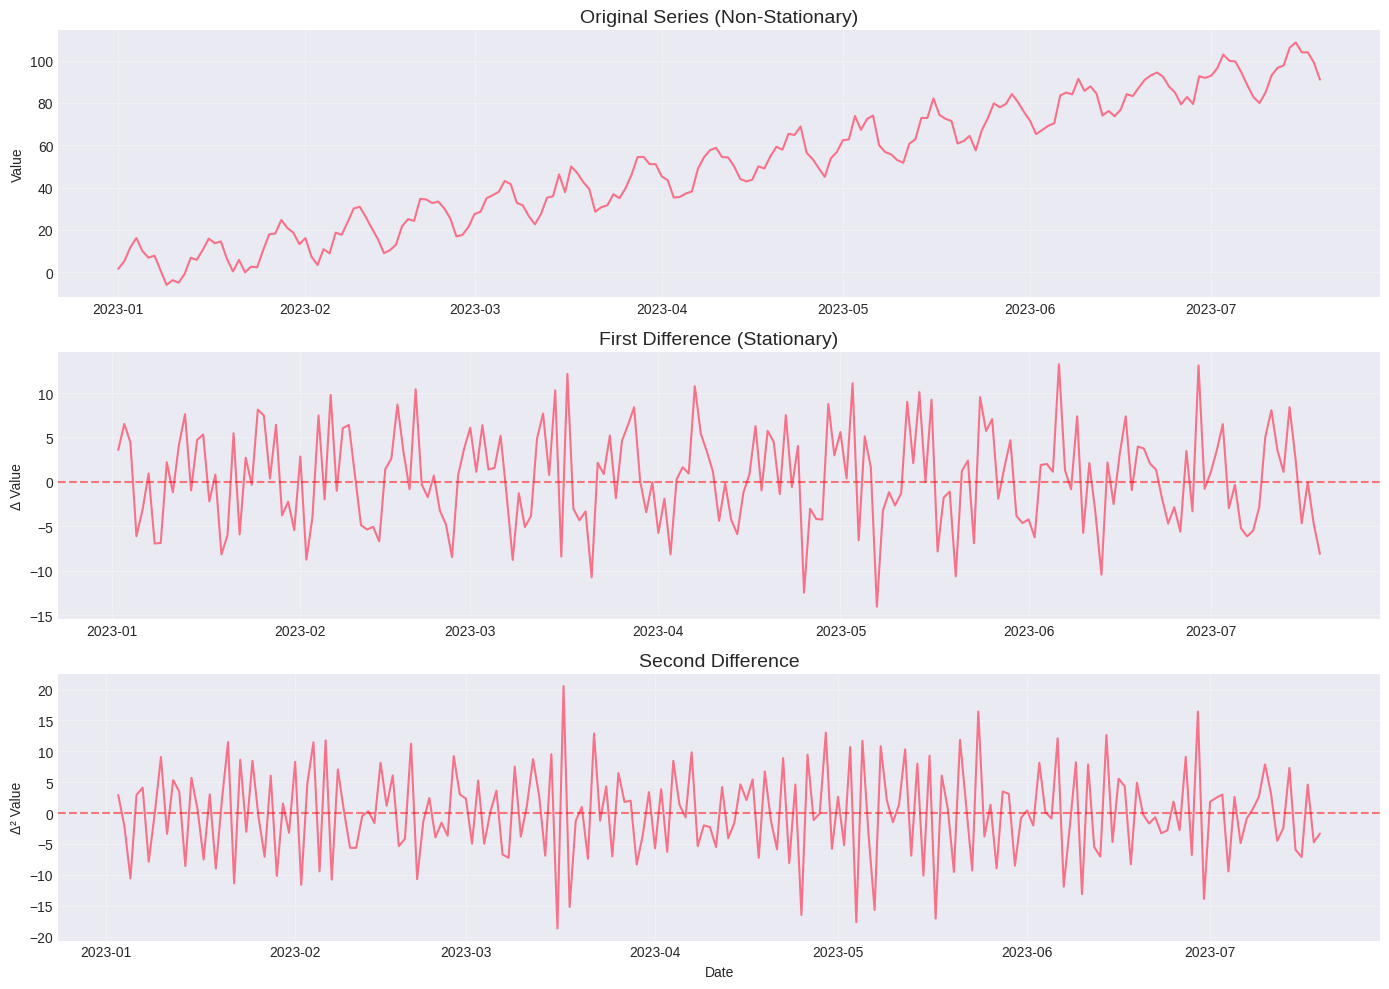


💡 Key Insights:
  • Stationarity requires: constant mean, variance, autocorrelation
  • ADF test: H0 = non-stationary (want to reject)
  • p-value < 0.05 → stationary
  • Differencing removes trend and achieves stationarity
  • d parameter in ARIMA(p,d,q) = order of differencing


In [47]:
# Generate non-stationary time series
np.random.seed(42)
n_points = 200

# Non-stationary: trend + seasonality + noise
time = np.arange(n_points)
trend = 0.5 * time
seasonality = 10 * np.sin(2 * np.pi * time / 12)
noise = np.random.randn(n_points) * 3
ts_nonstationary = trend + seasonality + noise

# Create DataFrame
ts_df = pd.DataFrame({
    'value': ts_nonstationary
}, index=pd.date_range('2023-01-01', periods=n_points, freq='D'))

# ADF Test function
def adf_test(series, name=''):
    """
    Augmented Dickey-Fuller test for stationarity.
    H0: Series is non-stationary (has unit root)
    H1: Series is stationary
    """
    result = adfuller(series, autolag='AIC')

    print(f'\n📊 ADF Test Results{" for " + name if name else ""}:')
    print(f'  ADF Statistic: {result[0]:.4f}')
    print(f'  p-value: {result[1]:.4f}')
    print(f'  Critical Values:')
    for key, value in result[4].items():
        print(f'    {key}: {value:.3f}')

    if result[1] <= 0.05:
        print(f'  ✅ Reject H0: Series is STATIONARY (p < 0.05)')
    else:
        print(f'  ❌ Fail to reject H0: Series is NON-STATIONARY (p ≥ 0.05)')

    return result[1] <= 0.05

# Test original series
is_stationary = adf_test(ts_df['value'], 'Original Series')

# Apply differencing
ts_df['diff1'] = ts_df['value'].diff()
ts_df['diff2'] = ts_df['diff1'].diff()

# Test first difference
is_stationary_diff1 = adf_test(ts_df['diff1'].dropna(), 'First Difference')

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

axes[0].plot(ts_df.index, ts_df['value'])
axes[0].set_title('Original Series (Non-Stationary)', fontsize=14)
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

axes[1].plot(ts_df.index, ts_df['diff1'])
axes[1].set_title('First Difference (Stationary)', fontsize=14)
axes[1].set_ylabel('Δ Value')
axes[1].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[1].grid(True, alpha=0.3)

axes[2].plot(ts_df.index, ts_df['diff2'])
axes[2].set_title('Second Difference', fontsize=14)
axes[2].set_ylabel('Δ² Value')
axes[2].set_xlabel('Date')
axes[2].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Key Insights:")
print("  • Stationarity requires: constant mean, variance, autocorrelation")
print("  • ADF test: H0 = non-stationary (want to reject)")
print("  • p-value < 0.05 → stationary")
print("  • Differencing removes trend and achieves stationarity")
print("  • d parameter in ARIMA(p,d,q) = order of differencing")

### Interview Question 11: Interpreting ACF/PACF Plots

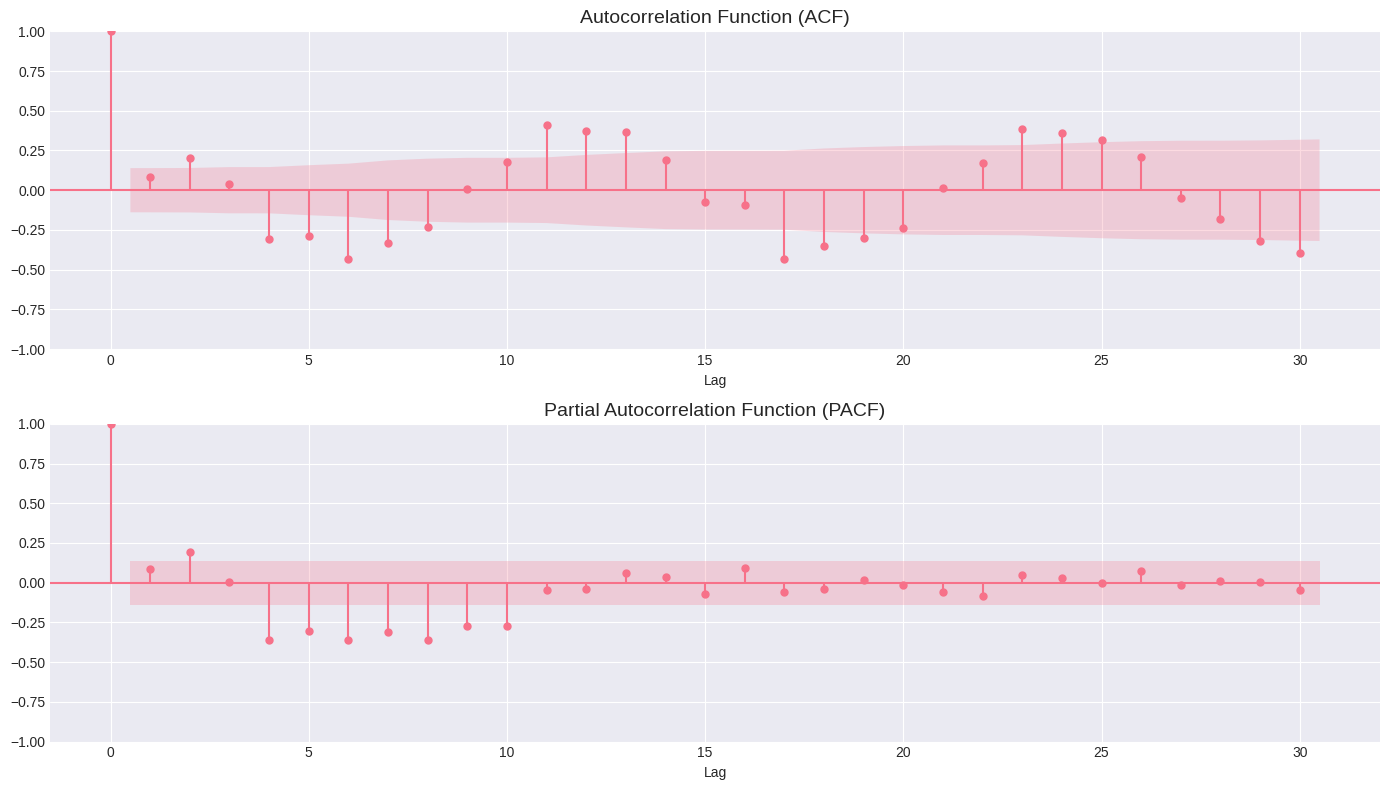


💡 How to Interpret ACF/PACF for ARIMA(p,d,q):

ACF (Autocorrelation Function):
  • Measures correlation between Yt and Yt-k
  • Helps identify MA(q) order
  • q = number of significant spikes before cutoff

PACF (Partial Autocorrelation Function):
  • Correlation after removing intermediate lags
  • Helps identify AR(p) order
  • p = number of significant spikes before cutoff

📋 Pattern Recognition:

AR(p) Process:
  ACF: Gradual decay
  PACF: Cuts off after lag p
  → Read p from PACF

MA(q) Process:
  ACF: Cuts off after lag q
  PACF: Gradual decay
  → Read q from ACF

ARMA(p,q) Process:
  ACF: Gradual decay
  PACF: Gradual decay
  → Use grid search or AIC/BIC criteria


In [48]:
# Use stationary series (first difference)
stationary_series = ts_df['diff1'].dropna()

# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# ACF
plot_acf(stationary_series, lags=30, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)', fontsize=14)
axes[0].set_xlabel('Lag')

# PACF
plot_pacf(stationary_series, lags=30, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)', fontsize=14)
axes[1].set_xlabel('Lag')

plt.tight_layout()
plt.show()

print("\n💡 How to Interpret ACF/PACF for ARIMA(p,d,q):")
print("\nACF (Autocorrelation Function):")
print("  • Measures correlation between Yt and Yt-k")
print("  • Helps identify MA(q) order")
print("  • q = number of significant spikes before cutoff")

print("\nPACF (Partial Autocorrelation Function):")
print("  • Correlation after removing intermediate lags")
print("  • Helps identify AR(p) order")
print("  • p = number of significant spikes before cutoff")

print("\n📋 Pattern Recognition:")
print("\nAR(p) Process:")
print("  ACF: Gradual decay")
print("  PACF: Cuts off after lag p")
print("  → Read p from PACF")

print("\nMA(q) Process:")
print("  ACF: Cuts off after lag q")
print("  PACF: Gradual decay")
print("  → Read q from ACF")

print("\nARMA(p,q) Process:")
print("  ACF: Gradual decay")
print("  PACF: Gradual decay")
print("  → Use grid search or AIC/BIC criteria")

### Interview Question 12: ARIMA Model Building

Training samples: 120
Test samples: 30

📊 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  120
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -175.891
Date:                Sun, 01 Feb 2026   AIC                            357.781
Time:                        13:55:57   BIC                            366.118
Sample:                    01-01-2023   HQIC                           361.167
                         - 04-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3356      3.489      0.096      0.923      -6.503       7.174
ma.L1         -0.3614      3.467     -0.104      0.917      -7.157  

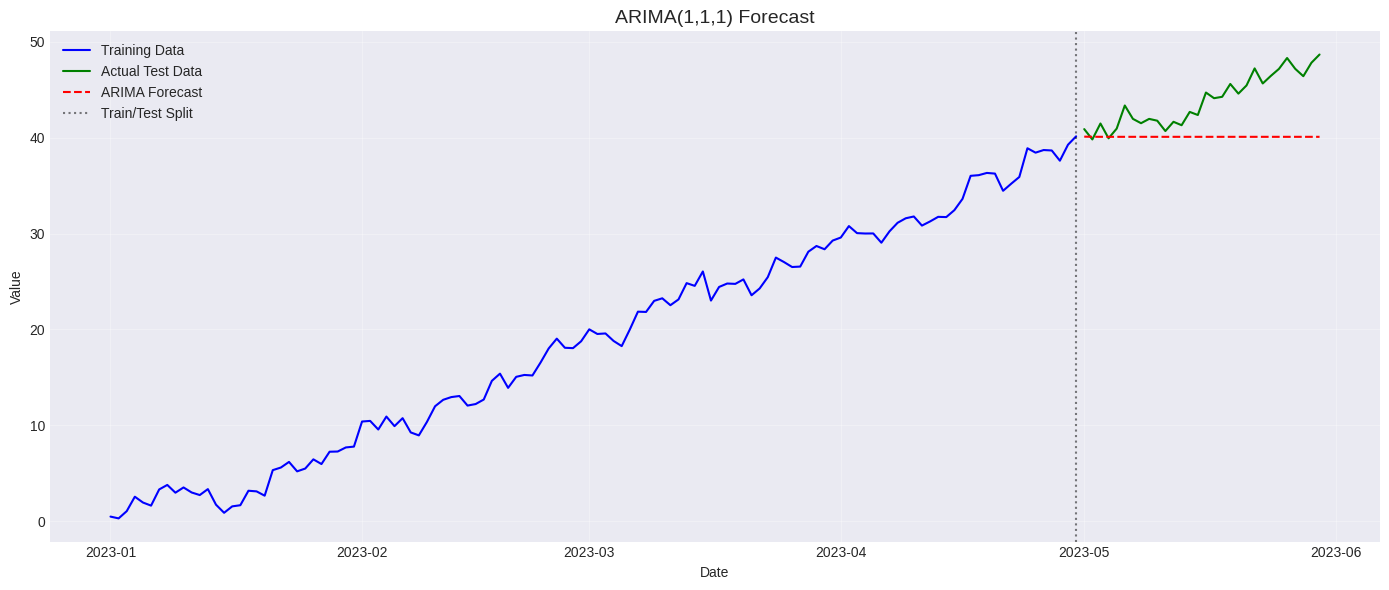


💡 ARIMA Interview Points:
  • ARIMA(p,d,q): p=AR order, d=differencing, q=MA order
  • Check stationarity first (ADF test)
  • Use ACF/PACF to determine p and q
  • AIC/BIC for model selection
  • Residuals should be white noise
  • For multi-step forecasts, use forecast() method


In [50]:
# Generate cleaner time series for ARIMA
np.random.seed(42)
n = 150
time_idx = pd.date_range('2023-01-01', periods=n, freq='D')

# AR(1) process with trend
ar_coef = 0.7
ts_arima = [np.random.randn()]
for i in range(1, n):
    ts_arima.append(ar_coef * ts_arima[i-1] + np.random.randn() + 0.1 * i)

ts_arima = np.array(ts_arima)
ts_arima_df = pd.DataFrame({'value': ts_arima}, index=time_idx)

# Split train/test
train_size = int(0.8 * len(ts_arima_df))
train = ts_arima_df[:train_size]
test = ts_arima_df[train_size:]

print(f"Training samples: {len(train)}")
print(f"Test samples: {len(test)}")

# Fit ARIMA model
# Based on ACF/PACF analysis, try ARIMA(1,1,1)
model = ARIMA(train['value'], order=(1, 1, 1))
fitted_model = model.fit()

print("\n📊 ARIMA Model Summary:")
print(fitted_model.summary())

# Forecast
forecast_steps = len(test)
forecast = fitted_model.forecast(steps=forecast_steps)

# Calculate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test['value'], forecast)
rmse = np.sqrt(mean_squared_error(test['value'], forecast))
mape = np.mean(np.abs((test['value'] - forecast) / test['value'])) * 100

print(f"\n📈 Forecast Metrics:")
print(f"  MAE: {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAPE: {mape:.2f}%")

# Plot results
plt.figure(figsize=(14, 6))
plt.plot(train.index, train['value'], label='Training Data', color='blue')
plt.plot(test.index, test['value'], label='Actual Test Data', color='green')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red', linestyle='--')
plt.axvline(x=train.index[-1], color='black', linestyle=':', alpha=0.5, label='Train/Test Split')
plt.title('ARIMA(1,1,1) Forecast', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 ARIMA Interview Points:")
print("  • ARIMA(p,d,q): p=AR order, d=differencing, q=MA order")
print("  • Check stationarity first (ADF test)")
print("  • Use ACF/PACF to determine p and q")
print("  • AIC/BIC for model selection")
print("  • Residuals should be white noise")
print("  • For multi-step forecasts, use forecast() method")

### Interview Question 13: SARIMA for Seasonal Data

📊 SARIMA Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -151.261
Date:                            Sun, 01 Feb 2026   AIC                            312.522
Time:                                    13:56:35   BIC                            323.693
Sample:                                01-01-2015   HQIC                           316.954
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1379      0.164     -0.841      0.401      -0.459       0.184
ma.L1      

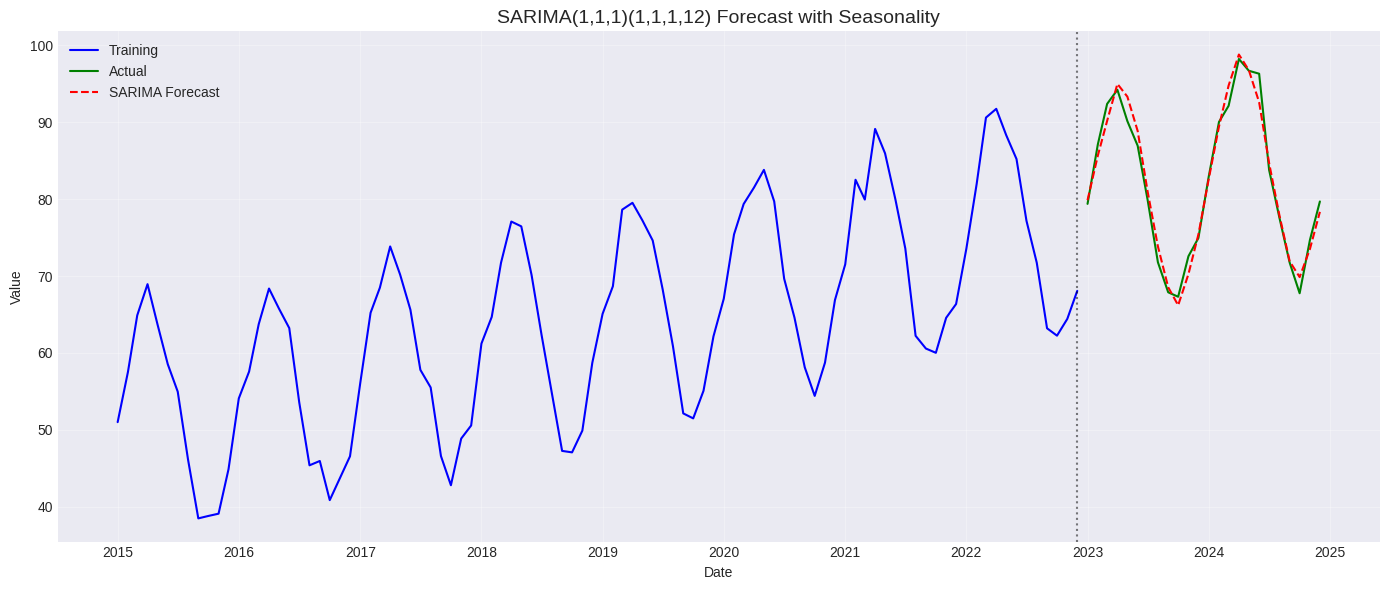


💡 SARIMA Interview Points:
  • SARIMA(p,d,q)(P,D,Q)s extends ARIMA with seasonal components
  • s = seasonal period (12 for monthly, 4 for quarterly)
  • P, D, Q = seasonal AR, differencing, MA orders
  • Use when clear seasonal patterns exist
  • Seasonal differencing: removes seasonal trends
  • Check seasonal ACF/PACF at multiples of s


In [51]:
# Generate seasonal time series
np.random.seed(42)
n_seasonal = 120  # 10 years of monthly data
time_seasonal = np.arange(n_seasonal)

# Components
trend_s = 0.3 * time_seasonal
seasonal_s = 15 * np.sin(2 * np.pi * time_seasonal / 12)  # Annual seasonality
noise_s = np.random.randn(n_seasonal) * 2
ts_seasonal = trend_s + seasonal_s + noise_s + 50

# Create DataFrame with monthly frequency
ts_seasonal_df = pd.DataFrame(
    {'value': ts_seasonal},
    index=pd.date_range('2015-01-01', periods=n_seasonal, freq='MS')
)

# Train/test split
train_seasonal = ts_seasonal_df[:96]  # 8 years
test_seasonal = ts_seasonal_df[96:]   # 2 years

# Fit SARIMA model
# SARIMA(p,d,q)(P,D,Q)s
# s=12 for monthly data with annual seasonality
sarima_model = SARIMAX(
    train_seasonal['value'],
    order=(1, 1, 1),           # Non-seasonal: (p,d,q)
    seasonal_order=(1, 1, 1, 12),  # Seasonal: (P,D,Q,s)
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_fitted = sarima_model.fit(disp=False)

print("📊 SARIMA Model Summary:")
print(sarima_fitted.summary())

# Forecast
sarima_forecast = sarima_fitted.forecast(steps=len(test_seasonal))

# Metrics
mae_s = mean_absolute_error(test_seasonal['value'], sarima_forecast)
rmse_s = np.sqrt(mean_squared_error(test_seasonal['value'], sarima_forecast))

print(f"\n📈 SARIMA Forecast Metrics:")
print(f"  MAE: {mae_s:.4f}")
print(f"  RMSE: {rmse_s:.4f}")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train_seasonal.index, train_seasonal['value'], label='Training', color='blue')
plt.plot(test_seasonal.index, test_seasonal['value'], label='Actual', color='green')
plt.plot(test_seasonal.index, sarima_forecast, label='SARIMA Forecast', color='red', linestyle='--')
plt.axvline(x=train_seasonal.index[-1], color='black', linestyle=':', alpha=0.5)
plt.title('SARIMA(1,1,1)(1,1,1,12) Forecast with Seasonality', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 SARIMA Interview Points:")
print("  • SARIMA(p,d,q)(P,D,Q)s extends ARIMA with seasonal components")
print("  • s = seasonal period (12 for monthly, 4 for quarterly)")
print("  • P, D, Q = seasonal AR, differencing, MA orders")
print("  • Use when clear seasonal patterns exist")
print("  • Seasonal differencing: removes seasonal trends")
print("  • Check seasonal ACF/PACF at multiples of s")

### Interview Question 14: PCA vs Manual Feature Selection

Original features: 50

📊 PCA Results:
  Components: 10
  Explained variance: 0.9904

📊 Manual Feature Selection:
  Selected features: [ 0  1  9 11 16 17 25 28 34 48]

📊 Method Comparison:
                Method  Test Accuracy Interpretability Training Speed
    Full Features (50)       0.933333             High           Slow
              PCA (10)       0.913333              Low           Fast
Feature Selection (10)       0.853333             High           Fast


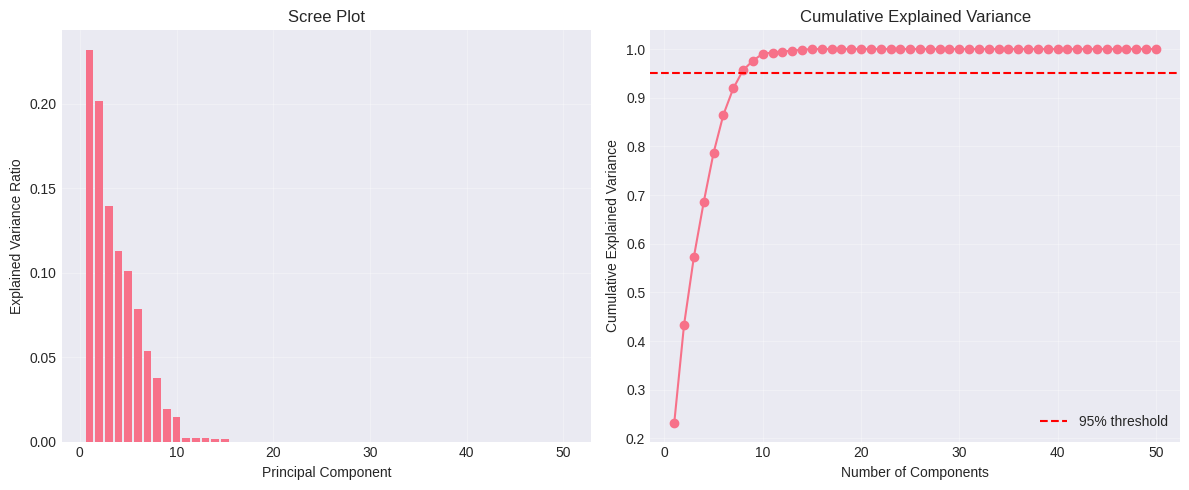


💡 PCA vs Manual Selection:

Use PCA when:
  ✅ Features are correlated
  ✅ Interpretability not critical
  ✅ Want to capture variance efficiently
  ✅ Noise reduction needed
  ✅ Visualization (2-3 components)

Use Manual Feature Selection when:
  ✅ Interpretability is critical
  ✅ Need to understand which original features matter
  ✅ Domain knowledge guides selection
  ✅ Regulatory requirements for explainability
  ✅ Features have different scales/types


In [52]:
# Generate high-dimensional dataset
X_highdim, y_highdim = make_classification(
    n_samples=500, n_features=50, n_informative=10,
    n_redundant=30, n_repeated=5, random_state=42
)

X_train_hd, X_test_hd, y_train_hd, y_test_hd = train_test_split(
    X_highdim, y_highdim, test_size=0.3, random_state=42
)

print(f"Original features: {X_train_hd.shape[1]}")

# Method 1: PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_hd)
X_test_pca = pca.transform(X_test_hd)

print(f"\n📊 PCA Results:")
print(f"  Components: {X_train_pca.shape[1]}")
print(f"  Explained variance: {pca.explained_variance_ratio_.sum():.4f}")

# Train model with PCA
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca, y_train_hd)
score_pca = rf_pca.score(X_test_pca, y_test_hd)

# Method 2: Manual Feature Selection (SelectKBest)
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_hd, y_train_hd)
X_test_selected = selector.transform(X_test_hd)

# Get selected feature indices
selected_features = selector.get_support(indices=True)
print(f"\n📊 Manual Feature Selection:")
print(f"  Selected features: {selected_features[:10]}")

# Train model with selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train_hd)
score_selected = rf_selected.score(X_test_selected, y_test_hd)

# Method 3: No dimensionality reduction
rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_full.fit(X_train_hd, y_train_hd)
score_full = rf_full.score(X_test_hd, y_test_hd)

# Comparison
comparison_df = pd.DataFrame({
    'Method': ['Full Features (50)', 'PCA (10)', 'Feature Selection (10)'],
    'Test Accuracy': [score_full, score_pca, score_selected],
    'Interpretability': ['High', 'Low', 'High'],
    'Training Speed': ['Slow', 'Fast', 'Fast']
})

print("\n📊 Method Comparison:")
print(comparison_df.to_string(index=False))

# Plot explained variance
pca_full = PCA().fit(X_train_hd)
cumsum = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca_full.explained_variance_ratio_) + 1),
        pca_full.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumsum) + 1), cumsum, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 PCA vs Manual Selection:")
print("\nUse PCA when:")
print("  ✅ Features are correlated")
print("  ✅ Interpretability not critical")
print("  ✅ Want to capture variance efficiently")
print("  ✅ Noise reduction needed")
print("  ✅ Visualization (2-3 components)")

print("\nUse Manual Feature Selection when:")
print("  ✅ Interpretability is critical")
print("  ✅ Need to understand which original features matter")
print("  ✅ Domain knowledge guides selection")
print("  ✅ Regulatory requirements for explainability")
print("  ✅ Features have different scales/types")

### Interview Question 15: Association Rules & Recommendation Systems

In [53]:
# Create market basket transactions
transactions = [
    ['Milk', 'Bread', 'Butter'],
    ['Milk', 'Bread', 'Eggs'],
    ['Milk', 'Butter'],
    ['Bread', 'Butter', 'Eggs'],
    ['Milk', 'Bread', 'Butter', 'Eggs'],
    ['Bread', 'Eggs'],
    ['Milk', 'Eggs'],
    ['Milk', 'Bread', 'Butter', 'Cheese'],
    ['Bread', 'Butter', 'Cheese'],
    ['Milk', 'Cheese']
]

# Transform to one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

print("Transaction Matrix:")
print(df_transactions.head())

# Find frequent itemsets
frequent_itemsets = apriori(df_transactions, min_support=0.3, use_colnames=True)

print("\n📊 Frequent Itemsets:")
print(frequent_itemsets.sort_values('support', ascending=False))

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values('lift', ascending=False)

print("\n📋 Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

print("\n💡 Interpretation:")
print("\nSupport:")
print("  • Frequency of itemset in transactions")
print("  • P(A ∩ B)")
print("  • Example: 0.3 = appears in 30% of transactions")

print("\nConfidence:")
print("  • Conditional probability")
print("  • P(B|A) = P(A ∩ B) / P(A)")
print("  • Example: 0.8 = 80% of A purchases include B")

print("\nLift:")
print("  • Strength of association")
print("  • Lift = Confidence / P(B)")
print("  • Lift > 1: Positive correlation (A → B)")
print("  • Lift = 1: Independent")
print("  • Lift < 1: Negative correlation")

# Recommendation system example
print("\n" + "="*60)
print("\n🎯 Recommendation System Fundamentals:")
print("\n1. Collaborative Filtering:")
print("   • User-based: Find similar users, recommend their items")
print("   • Item-based: Find similar items, recommend to same users")
print("   • Matrix factorization (SVD, ALS)")

print("\n2. Content-Based Filtering:")
print("   • Recommend similar items based on features")
print("   • Uses item attributes (genre, category, tags)")
print("   • TF-IDF, cosine similarity")

print("\n3. Cold Start Problem:")
print("   ⚠️  New users: no history")
print("   ⚠️  New items: no ratings")
print("   \n   Solutions:")
print("   • Hybrid approaches (combine collaborative + content)")
print("   • Popularity-based recommendations")
print("   • Onboarding questionnaires")
print("   • Transfer learning from similar domains")

Transaction Matrix:
   Bread  Butter  Cheese   Eggs   Milk
0   True    True   False  False   True
1   True   False   False   True   True
2  False    True   False  False   True
3   True    True   False   True  False
4   True    True   False   True   True

📊 Frequent Itemsets:
    support               itemsets
0       0.7                (Bread)
4       0.7                 (Milk)
1       0.6               (Butter)
5       0.5        (Bread, Butter)
3       0.5                 (Eggs)
7       0.4          (Bread, Milk)
6       0.4          (Bread, Eggs)
8       0.4         (Milk, Butter)
2       0.3               (Cheese)
9       0.3           (Milk, Eggs)
10      0.3  (Bread, Butter, Milk)

📋 Association Rules:
      antecedents     consequents  support  confidence      lift
7        (Butter)   (Bread, Milk)      0.3    0.500000  1.250000
4   (Bread, Milk)        (Butter)      0.3    0.750000  1.250000
1        (Butter)         (Bread)      0.5    0.833333  1.190476
0         (Bread)     

---
<a id='part5'></a>
## Part V: Explainability / XAI (ELI5, LIME, SHAP, DeepLift) (25 mins)

### Interview Question 16: ELI5 for Linear Models

Model Accuracy: 0.9766

📊 ELI5 Feature Weights:
Explained as: linear model

Features with largest coefficients.
Caveats:
1. Be careful with features which are not
   independent - weights don't show their importance.
2. If scale of input features is different then scale of coefficients
   will also be different, making direct comparison between coefficient values
   incorrect.
3. Depending on regularization, rare features sometimes may have high
   coefficients; this doesn't mean they contribute much to the
   classification result for most examples.

y=1 top features
 Weight  Feature                
-------  -----------------------
+31.253  <BIAS>                 
 +1.362  texture error          
 +1.047  mean radius            
 +0.448  perimeter error        
 +0.232  mean texture           
      … 4 more positive …       
      … 7 more negative …       
 -0.099  worst fractal dimension
 -0.119  radius error           
 -0.137  mean smoothness        
 -0.145  area error          

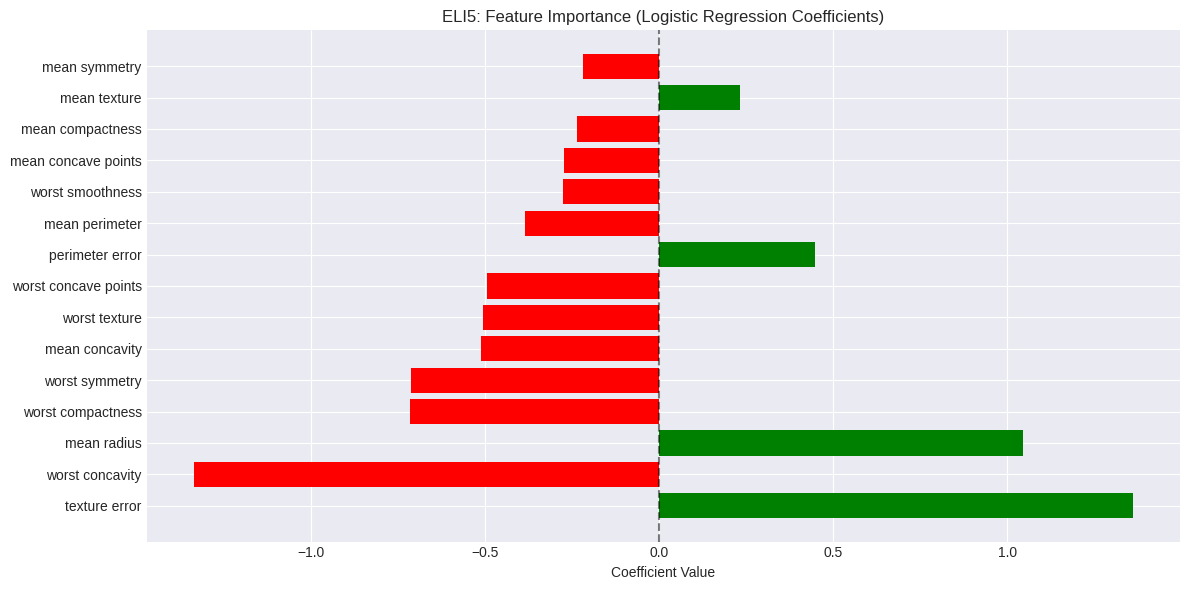


💡 ELI5 Key Points:
  • Best for white-box models (linear, tree-based)
  • Inspects model coefficients/feature importances
  • Positive coefficient → increases probability of class 1
  • Negative coefficient → decreases probability of class 1
  • Simple debugging and validation tool
  • Limited to inherently interpretable models


In [55]:
# Train a logistic regression model
from sklearn.datasets import load_breast_cancer

# Load data
cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cancer = cancer.target

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cancer, y_cancer, test_size=0.3, random_state=42
)

# Train logistic regression
lr_cancer = LogisticRegression(max_iter=10000, random_state=42)
lr_cancer.fit(X_train_c, y_train_c)

print(f"Model Accuracy: {lr_cancer.score(X_test_c, y_test_c):.4f}")

# ELI5 explanation
print("\n📊 ELI5 Feature Weights:")
print(eli5.format_as_text(eli5.explain_weights(lr_cancer, feature_names=list(X_cancer.columns))))

# Manual coefficient interpretation
coef_df = pd.DataFrame({
    'Feature': X_cancer.columns,
    'Coefficient': lr_cancer.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n📊 Top 10 Most Important Features:")
print(coef_df.head(10).to_string(index=False))

# Visualize
plt.figure(figsize=(12, 6))
top_features = coef_df.head(15)
colors = ['red' if x < 0 else 'green' for x in top_features['Coefficient']]
plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value')
plt.title('ELI5: Feature Importance (Logistic Regression Coefficients)')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("\n💡 ELI5 Key Points:")
print("  • Best for white-box models (linear, tree-based)")
print("  • Inspects model coefficients/feature importances")
print("  • Positive coefficient → increases probability of class 1")
print("  • Negative coefficient → decreases probability of class 1")
print("  • Simple debugging and validation tool")
print("  • Limited to inherently interpretable models")

### Interview Question 17: LIME (Local Interpretable Model-Agnostic Explanations)

In [60]:
# Train a black-box model (Random Forest)
rf_cancer = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cancer.fit(X_train_c, y_train_c)

print(f"Random Forest Accuracy: {rf_cancer.score(X_test_c, y_test_c):.4f}")

# Create LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_c),
    feature_names=X_cancer.columns,
    class_names=['Malignant', 'Benign'],
    mode='classification'
)

# Explain a single prediction
instance_idx = 0
# Fix: Use .iloc for positional indexing in pandas DataFrames
instance = X_test_c.iloc[instance_idx].values
true_label = y_test_c[instance_idx]
predicted_label = rf_cancer.predict([instance])[0]
predicted_proba = rf_cancer.predict_proba([instance])[0]

print(f"\n🔍 Explaining instance {instance_idx}:")
print(f"  True label: {cancer.target_names[true_label]}")
print(f"  Predicted: {cancer.target_names[predicted_label]}")
print(f"  Probability: {predicted_proba[predicted_label]:.4f}")

# Generate explanation
explanation = explainer.explain_instance(
    instance,
    rf_cancer.predict_proba,
    num_features=10
)

# Display explanation
print("\n📊 LIME Explanation:")
for feature, weight in explanation.as_list():
    print(f"  {feature}: {weight:.4f}")

# Visualize (text output since matplotlib figure requires display)
print("\n💡 LIME Interpretation:")
print("  • Perturbs input around instance")
print("  • Trains simple linear model locally")
print("  • Explains individual prediction (local)")
print("  • Model-agnostic (works with any black-box)")
print("  • Positive weight → supports predicted class")
print("  • Negative weight → against predicted class")

print("\n🎯 Use Cases:")
print("  • Debugging individual misclassifications")
print("  • Justifying specific decisions to stakeholders")
print("  • Medical diagnosis explanations")
print("  • Loan approval/rejection reasons")

Random Forest Accuracy: 0.9708

🔍 Explaining instance 0:
  True label: benign
  Predicted: benign
  Probability: 0.9700

📊 LIME Explanation:
  521.55 < worst area <= 687.60: 0.0648
  84.54 < worst perimeter <= 97.75: 0.0506
  13.07 < worst radius <= 14.98: 0.0328
  0.23 < worst concavity <= 0.38: -0.0302
  21.07 < worst texture <= 25.16: 0.0219
  16.17 < mean texture <= 18.70: 0.0196
  426.18 < mean area <= 546.25: 0.0154
  0.03 < mean concave points <= 0.07: -0.0141
  0.10 < worst concave points <= 0.16: 0.0139
  0.32 < radius error <= 0.47: 0.0134

💡 LIME Interpretation:
  • Perturbs input around instance
  • Trains simple linear model locally
  • Explains individual prediction (local)
  • Model-agnostic (works with any black-box)
  • Positive weight → supports predicted class
  • Negative weight → against predicted class

🎯 Use Cases:
  • Debugging individual misclassifications
  • Justifying specific decisions to stakeholders
  • Medical diagnosis explanations
  • Loan approval/rej

### Interview Question 18: SHAP (SHapley Additive exPlanations)

📊 SHAP Values Shape: (50, 30)
  • 50 instances
  • 30 features

📊 Global Feature Importance (SHAP):
             Feature  SHAP Importance
        worst radius         0.061629
      mean concavity         0.044153
          worst area         0.044090
worst concave points         0.039396
     worst perimeter         0.038113
 mean concave points         0.032893
          area error         0.031794
        radius error         0.028472
      mean perimeter         0.024882
           mean area         0.024067


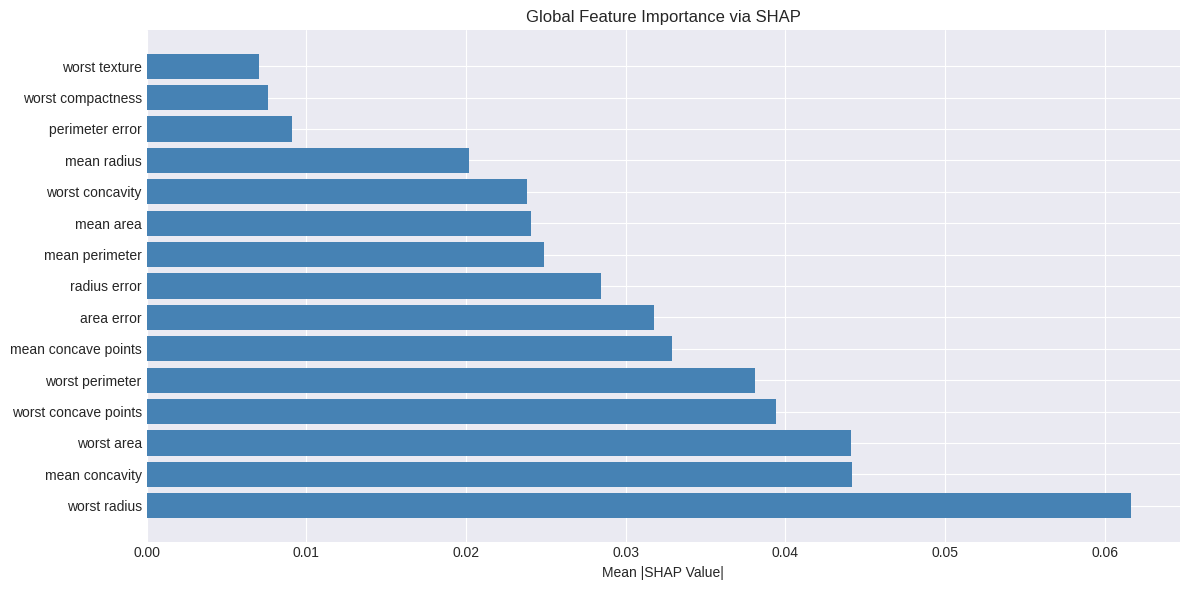


🔍 SHAP Values for Instance 0:
             Feature     Value  SHAP Value
        worst radius  14.97000    0.047678
      mean concavity   0.08005    0.041401
          worst area 677.90000    0.034479
worst concave points   0.10150    0.032611
      mean perimeter  81.09000    0.024881
     worst perimeter  96.05000    0.023970
         mean radius  12.47000    0.023243
           mean area 481.90000    0.019847
          area error  30.29000    0.017474
 mean concave points   0.03821    0.014888

💡 SHAP Key Concepts:
  • Based on Shapley values from game theory
  • Fairly distributes prediction among features
  • Additive: sum of SHAP values = prediction - baseline
  • Consistent & theoretically grounded
  • Both local (individual) and global (average) explanations
  • TreeSHAP: Optimized for tree-based models

🎯 SHAP vs LIME:
  SHAP Advantages:
    ✅ Theoretically grounded (Shapley values)
    ✅ Consistent explanations
    ✅ Both local and global interpretability
    ✅ Additive pro

In [61]:
# Use subset for faster computation
X_train_shap = X_train_c[:200]
X_test_shap = X_test_c[:50]

# Train model
rf_shap = RandomForestClassifier(n_estimators=50, random_state=42)
rf_shap.fit(X_train_shap, y_train_c[:200])

# Create SHAP explainer (TreeExplainer for tree models)
explainer_shap = shap.TreeExplainer(rf_shap)

# Calculate SHAP values
shap_values = explainer_shap.shap_values(X_test_shap)

# Handle different SHAP output formats (List vs 3D Array)
if isinstance(shap_values, list):
    # Older SHAP versions return a list for binary/multi-class
    shap_values_class1 = shap_values[1]
elif len(shap_values.shape) == 3:
    # Newer SHAP versions return (samples, features, classes)
    shap_values_class1 = shap_values[:, :, 1]
else:
    shap_values_class1 = shap_values

print("📊 SHAP Values Shape:", shap_values_class1.shape)
print(f"  • {shap_values_class1.shape[0]} instances")
print(f"  • {shap_values_class1.shape[1]} features")

# Global feature importance
shap_importance = np.abs(shap_values_class1).mean(axis=0)
importance_df = pd.DataFrame({
    'Feature': X_cancer.columns,
    'SHAP Importance': shap_importance
}).sort_values('SHAP Importance', ascending=False)

print("\n📊 Global Feature Importance (SHAP):")
print(importance_df.head(10).to_string(index=False))

# Visualize top features
plt.figure(figsize=(12, 6))
top_shap = importance_df.head(15)
plt.barh(range(len(top_shap)), top_shap['SHAP Importance'], color='steelblue')
plt.yticks(range(len(top_shap)), top_shap['Feature'])
plt.xlabel('Mean |SHAP Value|')
plt.title('Global Feature Importance via SHAP')
plt.tight_layout()
plt.show()

# Explain single instance
instance_shap = 0
print(f"\n🔍 SHAP Values for Instance {instance_shap}:")
instance_shap_df = pd.DataFrame({
    'Feature': X_cancer.columns,
    'Value': X_test_shap.iloc[instance_shap].values,
    'SHAP Value': shap_values_class1[instance_shap]
}).sort_values('SHAP Value', key=abs, ascending=False)

print(instance_shap_df.head(10).to_string(index=False))

print("\n💡 SHAP Key Concepts:")
print("  • Based on Shapley values from game theory")
print("  • Fairly distributes prediction among features")
print("  • Additive: sum of SHAP values = prediction - baseline")
print("  • Consistent & theoretically grounded")
print("  • Both local (individual) and global (average) explanations")
print("  • TreeSHAP: Optimized for tree-based models")

print("\n🎯 SHAP vs LIME:")
print("  SHAP Advantages:")
print("    ✅ Theoretically grounded (Shapley values)")
print("    ✅ Consistent explanations")
print("    ✅ Both local and global interpretability")
print("    ✅ Additive property")
print("  LIME Advantages:")
print("    ✅ Faster for single predictions")
print("    ✅ Simpler intuition (local linear model)")
print("    ✅ Works with any model type")

### Interview Question 19: When to Use Which Explainability Tool?

In [62]:
# Summary comparison
explainability_comparison = pd.DataFrame({
    'Tool': ['ELI5', 'LIME', 'SHAP', 'DeepLift'],
    'Scope': ['Global', 'Local', 'Both', 'Local'],
    'Model Type': ['White-box', 'Any', 'Any', 'Neural Nets'],
    'Speed': ['Fast', 'Medium', 'Slow', 'Medium'],
    'Theory': ['Coefficients', 'Perturbation', 'Game Theory', 'Backpropagation'],
    'Best For': ['Linear/Trees', 'Single Predictions', 'Comprehensive', 'Deep Learning']
})

print("📊 Explainability Tools Comparison:")
print(explainability_comparison.to_string(index=False))

print("\n" + "="*60)
print("\n💡 Decision Framework:")

print("\n1️⃣  Model is Linear/Logistic Regression?")
print("    → Use ELI5 (inspect coefficients)")

print("\n2️⃣  Need to explain ONE specific prediction?")
print("    → Use LIME (fast local explanation)")

print("\n3️⃣  Need both local AND global explanations?")
print("    → Use SHAP (comprehensive, consistent)")

print("\n4️⃣  Working with Deep Neural Networks?")
print("    → Use DeepLift or Integrated Gradients")

print("\n5️⃣  Tree-based models (RF, XGBoost, LightGBM)?")
print("    → Use SHAP with TreeExplainer (optimized)")

print("\n6️⃣  Production deployment with tight latency?")
print("    → Pre-compute SHAP values or use ELI5")

print("\n7️⃣  Regulatory compliance (GDPR, medical)?")
print("    → Use SHAP (theoretical foundation)")

print("\n" + "="*60)
print("\n🎯 Interview Tips:")
print("  • Always start with: 'What is the use case?'")
print("  • Consider: local vs global, speed, model type")
print("  • Mention trade-offs explicitly")
print("  • For complex models, combine multiple tools")
print("  • Feature importance ≠ causation")
print("  • Explain to non-technical stakeholders simply")

📊 Explainability Tools Comparison:
    Tool  Scope  Model Type  Speed          Theory           Best For
    ELI5 Global   White-box   Fast    Coefficients       Linear/Trees
    LIME  Local         Any Medium    Perturbation Single Predictions
    SHAP   Both         Any   Slow     Game Theory      Comprehensive
DeepLift  Local Neural Nets Medium Backpropagation      Deep Learning


💡 Decision Framework:

1️⃣  Model is Linear/Logistic Regression?
    → Use ELI5 (inspect coefficients)

2️⃣  Need to explain ONE specific prediction?
    → Use LIME (fast local explanation)

3️⃣  Need both local AND global explanations?
    → Use SHAP (comprehensive, consistent)

4️⃣  Working with Deep Neural Networks?
    → Use DeepLift or Integrated Gradients

5️⃣  Tree-based models (RF, XGBoost, LightGBM)?
    → Use SHAP with TreeExplainer (optimized)

6️⃣  Production deployment with tight latency?
    → Pre-compute SHAP values or use ELI5

7️⃣  Regulatory compliance (GDPR, medical)?
    → Use SHAP (the

---
## Summary & Final Checklist

### Key Topics Covered:

✅ **Part II: SVM, Naive Bayes & Feature Engineering**
- SVM vs Logistic Regression decision criteria
- RBF kernel intuition and visualization
- When Naive Bayes fails (feature correlation)
- Feature engineering for transactional data
- Spotting and preventing feature leakage

✅ **Part III: Model Selection & Pipelines**
- Stratified CV for imbalanced data
- Choosing metrics (Precision, Recall, F1, AUC)
- Pipeline benefits and leakage prevention
- GridSearchCV vs RandomizedSearchCV

✅ **Part IV: Time Series & Advanced Topics**
- Stationarity testing (ADF test)
- ACF/PACF interpretation for ARIMA
- ARIMA model building and forecasting
- SARIMA for seasonal data
- PCA vs manual feature selection
- Association rules and recommendation systems

✅ **Part V: Explainability (XAI)**
- ELI5 for linear models
- LIME for local explanations
- SHAP for comprehensive interpretability
- Decision framework for tool selection

---

### Interview Preparation Checklist:

- [ ] Understand algorithm trade-offs (SVM vs LR, PCA vs Selection)
- [ ] Know when to use each cross-validation strategy
- [ ] Explain metrics for imbalanced data clearly
- [ ] Demonstrate pipeline usage to prevent leakage
- [ ] Interpret ACF/PACF plots for time series
- [ ] Explain ARIMA parameters (p, d, q)
- [ ] Describe association rule metrics (support, confidence, lift)
- [ ] Compare explainability tools (ELI5, LIME, SHAP)
- [ ] Practice structured problem-solving
- [ ] Communicate technical concepts simply

---

**Good luck with your MLOps interviews! 🚀**